<h1>Pytorch</h1>


# Ref
* https://pytorch.org/docs/stable/index.html


# import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
torch.__version__

'2.0.1+cu117'

# Tensor object
* `torch.tensor(data, dtype)`
* `torch.XXXTensor(data)`
* ![](https://wikidocs.net/images/page/52846/newimage.png)

* `torch.tensor(data)`

tensor(10)


* `torch.tensor(data, dtype)`

tensor([1., 2., 3., 4., 5.])

* `torch.FloatTensor(data)`

tensor([0., 1., 2., 3., 4., 5.])

## 속성
* `t.shape`, `t.dim()`, `t.size()`

(1, torch.Size([6]), torch.Size([6]))

* `t.name`, `t.dtype`, `t.device`

(None, torch.float32, device(type='cpu'))

## CUDA device
* `torch.cuda.is_available()`



True

* `torch.cuda.XXXTensor(data)`

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')

* `torch.tensor(v, device=torch.device('cuda'))`

(tensor(10, device='cuda:0'), device(type='cuda', index=0))

(tensor(10, device='cuda:0'), device(type='cuda', index=0))

* `tensor.to('cuda')`, `tensor.to('cpu')`

(tensor(10, device='cuda:0'), device(type='cuda', index=0))

* `tensor.cuda()`, `tensor.cpu()`

(tensor(10, device='cuda:0'), device(type='cuda', index=0))

* 서로 다른 장치가 연산 불가

In [19]:
a = torch.tensor([1,2,3])
b = torch.tensor(20, device='cuda')
a.device, b.device

(device(type='cpu'), device(type='cuda', index=0))

In [21]:
a*b  #오류 발생

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

tensor([20, 40, 60], device='cuda:0')

tensor([20, 40, 60])

## shape으로 생성

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

tensor([[2, 2, 2, 2],
        [2, 2, 2, 2],
        [2, 2, 2, 2]])

## 무작위 수로 생성

tensor([[0.1689, 0.2939, 0.5185, 0.6977],
        [0.8000, 0.1610, 0.2823, 0.6816],
        [0.9152, 0.3971, 0.8742, 0.4194]])

tensor([[13, 16, 17, 14],
        [17, 17, 17, 19],
        [10, 12, 18, 11]])

tensor([[ 2.2585, -2.1120, -0.5786,  0.6473],
        [ 0.7739,  1.0141, -1.5353, -0.4139],
        [-1.4741,  0.0739, -1.1484,  0.1974]])

tensor([0.4963])

## arange, 수열로 생성

In [ ]:
#torch.range(), deprecated


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

tensor([10, 12, 14, 16, 18])

tensor([1.2000, 1.4000, 1.6000, 1.8000, 2.0000, 2.2000, 2.4000, 2.6000, 2.8000,
        3.0000, 3.2000])

## 기존 tensor를 이용한 생성, XXXs_like()

In [ ]:
a = torch.rand(3,4)
a, a.shape

(tensor([[0.5529, 0.9527, 0.0362, 0.1852],
         [0.3734, 0.3051, 0.9320, 0.1759],
         [0.2698, 0.1507, 0.0317, 0.2081]]),
 torch.Size([3, 4]))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

tensor([[-1., -1., -1., -1.],
        [-1., -1., -1., -1.],
        [-1., -1., -1., -1.]])

# indexing, slicing

In [ ]:
t = torch.FloatTensor([[1,2,3], [4,5,6], [7,8,9]])
t

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

tensor([1., 2., 3.])

tensor(6.)

tensor([[4., 5., 6.],
        [7., 8., 9.]])

tensor(6.)

tensor([[2., 3.],
        [5., 6.],
        [8., 9.]])

tensor([[1., 2., 3.],
        [7., 8., 9.]])

tensor([[1., 3.],
        [4., 6.],
        [7., 9.]])

# Math Operation

# Operator Overriding

In [ ]:
a = torch.tensor(10)

In [ ]:
a.add(1), a+1

(tensor(11), tensor(11))

In [ ]:
a.subtract(1), a-1

(tensor(9), tensor(9))

In [ ]:
a.mul(2), a*2

(tensor(20), tensor(20))

In [ ]:
a.div(2), a/2

(tensor(5.), tensor(5.))

## broadcasting(Element-Wise)

In [ ]:
a = torch.tensor([10,20,30])
b = torch.tensor([1,2,3])

a+b, a-b, a*b, a/b

(tensor([11, 22, 33]),
 tensor([ 9, 18, 27]),
 tensor([10, 40, 90]),
 tensor([10., 10., 10.]))

In [ ]:
a = torch.tensor([10,20,30])
a+10, a-10, a*2, a/2

(tensor([20, 30, 40]),
 tensor([ 0, 10, 20]),
 tensor([20, 40, 60]),
 tensor([ 5., 10., 15.]))

## inplace operation

In [ ]:
a = torch.tensor([[1,2], [3,4]])
a

tensor([[1, 2],
        [3, 4]])

In [ ]:
b = a.add(3)
a, b

(tensor([[1, 2],
         [3, 4]]),
 tensor([[4, 5],
         [6, 7]]))

In [ ]:
c = a.add_(3)
a, c

(tensor([[4, 5],
         [6, 7]]),
 tensor([[4, 5],
         [6, 7]]))

# statiscal

In [ ]:
a = torch.FloatTensor([[1,2], [3,4]], )
a

tensor([[1., 2.],
        [3., 4.]])

In [ ]:
a.mean(), a.sum(), a.max(), a.min()

(tensor(2.5000), tensor(10.), tensor(4.), tensor(1.))

(tensor([2., 3.]), tensor([1.5000, 3.5000]))

(tensor([4., 6.]), tensor([3., 7.]))

(tensor([3., 4.]), tensor([1, 1]))

(tensor([1., 3.]), tensor([0, 0]))

# Tensor 관리

## 재배치
* `view()`
* `reshape()`

In [ ]:
t = torch.FloatTensor([1,2,3,4,5,6])



tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [ ]:
ft = t.view(1,3,2,1)


torch.Size([1, 3, 2, 1])

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

## 길이가 1인 축 제어
* `squeeze()`
* `unsqueeze(dim)`

In [ ]:
a = torch.arange(12).reshape(3,1,4,1)
a,a.shape

(tensor([[[[ 0],
           [ 1],
           [ 2],
           [ 3]]],
 
 
         [[[ 4],
           [ 5],
           [ 6],
           [ 7]]],
 
 
         [[[ 8],
           [ 9],
           [10],
           [11]]]]),
 torch.Size([3, 1, 4, 1]))

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 torch.Size([3, 4]))

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]]]),
 torch.Size([1, 3, 4]))

## type casting


In [ ]:
t = torch.FloatTensor([1.2,2.3,3.4,4.5])
t.dtype

torch.float32

In [ ]:
t.int().dtype

torch.int32

In [ ]:
t.long().dtype

torch.int64

In [ ]:
t.float().dtype

torch.float32

## 병합

In [ ]:
t1 = torch.arange(6).reshape(2,3)
t2 = torch.arange(16, 22).reshape(2,3)
display(t1, t2)


tensor([[0, 1, 2],
        [3, 4, 5]])

tensor([[16, 17, 18],
        [19, 20, 21]])

* cat

(tensor([[ 0.,  1.,  2.],
         [ 3.,  4.,  5.],
         [16., 17., 18.],
         [19., 20., 21.]]),
 torch.Size([4, 3]))

(tensor([[ 0.,  1.,  2., 16., 17., 18.],
         [ 3.,  4.,  5., 19., 20., 21.]]),
 torch.Size([2, 6]))

* stack

(tensor([[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.]],
 
         [[16., 17., 18.],
          [19., 20., 21.]]]),
 torch.Size([2, 2, 3]))

(tensor([[[ 0., 16.],
          [ 1., 17.],
          [ 2., 18.]],
 
         [[ 3., 19.],
          [ 4., 20.],
          [ 5., 21.]]]),
 torch.Size([2, 3, 2]))

# 자동 미분
* `requires_grad=True`
* `cost.backward()`
* `tensor.grad`

In [ ]:
x = torch.tensor(3., requires_grad=True)
y = x **2
print(f'y:{y}')
z = 2 * y
print(f'z:{z}')


y:9.0
z:18.0
dz:12.0


* `torch.autograd.grad()`

In [ ]:
x = torch.tensor(3., requires_grad=True)
y = x **2
print(f'y:{y}')
z = 2 * y
print(f'z:{z}')


y:9.0
z:18.0
dy:(tensor(6.),)
dz:(tensor(12.),)


In [ ]:
x = torch.tensor(3., requires_grad=True)
y = x **2
print(f'y:{y}')
z = 2 * y
print(f'z:{z}')

y.backward(retain_graph=True)
print(f'dy:{x.grad}')

z.backward()
print(f'dz:{x.grad}')

y:9.0
z:18.0
dy:6.0
dz:18.0


# NumPy 객체 변환

In [24]:
a = np.array([1,2,3,4])
b = torch.from_numpy(a)
b

tensor([1, 2, 3, 4], dtype=torch.int32)

array([1, 2, 3, 4])

* `requires_grad=True`로 생성한 tensor
    * `tensor.detach()` 호출 필요

In [39]:
a = torch.tensor(2.,  requires_grad=True)
a.numpy() # 오류 발생

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

array(2., dtype=float32)

* cuda 장치에 `requires_grad=True`인 tensor
    * cpu로 이동 필요

In [42]:
b = torch.tensor(2.,  requires_grad=True, device='cuda')
b.detach().numpy() # 오류 발생

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

array(2., dtype=float32)

# 선형회귀

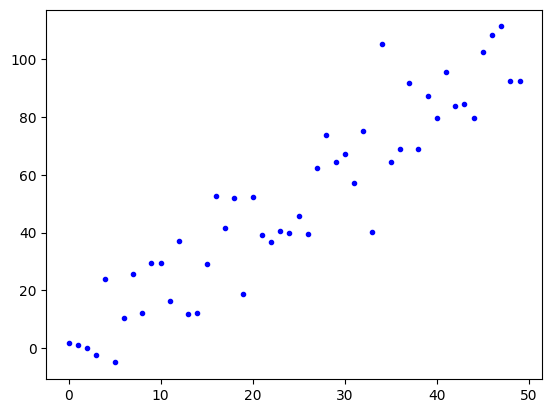

In [ ]:
import matplotlib.pyplot as plt

torch.manual_seed(777)
m = 50
X = 
y = 


plt.plot(X, y, 'b.')

Epoch:0 W:0.4061444103717804, b:0.009800707921385765, cost:3391.945556640625, gradient:-3242.291015625
Epoch:20 W:2.01865816116333, b:0.9561110734939575, cost:143.71856689453125, gradient:-79.39769744873047
Epoch:40 W:2.032474994659424, b:2.103633403778076, cost:142.9861297607422, gradient:14.422710418701172
Epoch:60 W:2.000445604324341, b:3.184799909591675, cost:144.71490478515625, gradient:16.08077621459961
Epoch:80 W:1.9696635007858276, b:4.171477317810059, cost:146.79794311523438, gradient:14.681190490722656
Epoch:100 W:1.9421005249023438, b:5.044960021972656, cost:149.0658416748047, gradient:12.92572021484375


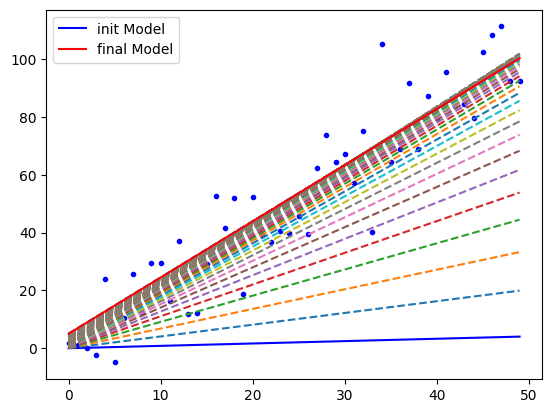

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
torch.manual_seed(777)
# code here.


# Optimizer
* optimizer 시각화 : http://www.denizyuret.com/2015/03/alec-radfords-animations-for.html

Epoch:0 W:tensor([0.4061], requires_grad=True), b:0.009800707921385765, cost:3391.945556640625
Epoch:20 W:tensor([2.0361], requires_grad=True), b:0.05865742266178131, cost:144.1429443359375
Epoch:40 W:tensor([2.0838], requires_grad=True), b:0.059554144740104675, cost:141.3599395751953
Epoch:60 W:tensor([2.0852], requires_grad=True), b:0.059047527611255646, cost:141.35740661621094
Epoch:80 W:tensor([2.0853], requires_grad=True), b:0.05850039795041084, cost:141.35723876953125
Epoch:100 W:tensor([2.0853], requires_grad=True), b:0.05795261636376381, cost:141.35708618164062


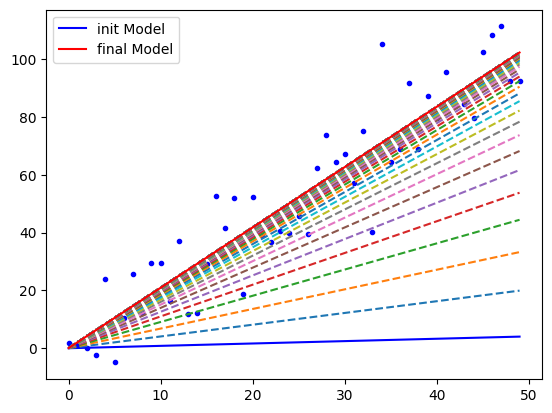

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y, 'b.')
torch.manual_seed(777)

W = torch.rand(1, requires_grad=True)  # 자동 미분 가능, Variable
b = torch.tensor(0., requires_grad=True)
plt.plot(X, (W*X+b).detach().numpy(), 'b-', label='init Model')

# code here